# Implementation of Neural Network from the lecture

## Import necessary libraries

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split,cross_val_score

## Fetch a database and prepare it

In this case we are using the "titanic" database of survival or no survival

In [29]:
df_X,df_y = fetch_openml("titanic",version=1, return_X_y=True, parser='auto')

### Set the strings to integers

In [30]:
df_X['embarked'] = pd.factorize(df_X['embarked'])[0]
df_X['sex'] = pd.factorize(df_X['sex'])[0]

### Drop unecessary features

In [31]:
df_X = df_X.drop(['name','body','ticket','cabin','home.dest','boat'],axis=1)

### Fill NULL values

In [32]:
embarkedMode = df_X['embarked'].mode()
df_X['embarked'] = df_X['embarked'].fillna(embarkedMode)
df_X['fare'] = df_X['fare'].fillna(df_X['fare'].mean())
df_X['age'] = df_X['age'].fillna(df_X['age'].mean())

## Split the the training and testing data 

In [33]:
X_train,X_test,y_train,y_test = train_test_split(df_X,df_y,test_size=0.3)

## Import and set the model up

- hidde_layer_size = defines how many number neurons are going to be in the hidden layer (in this example in the first hidden layer we have "3" neurons, in the second hidden layer we have "6" neurons).

- max_iter = sets how many iterations its going to go through to train. (Stops at 3000 iterations because ANN can take a long time compared to other machine learning models)

In [34]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(3,6),max_iter=3000)

In [35]:
mlp.fit(X_train,y_train)

MLPClassifier(hidden_layer_sizes=(3, 6), max_iter=3000)

## Test the model

### Predict labels from X_test

In [37]:
from sklearn import metrics
y_pred = mlp.predict(X_test)

### Compare with actual labels

Will print out the percentage of accuracy

In [39]:
print(metrics.accuracy_score(y_test,y_pred))

0.7786259541984732


## Cross-validation

To remove any bias

In [40]:
acc_ann = cross_val_score(mlp,data,target,cv=5,scoring='acuracy').mean()

NameError: name 'data' is not defined

## Interpretation

This will show us different things:

In [42]:
print("Number of outputs:",mlp.n_outputs_)
print("Weights between input and first hidden layer:",mlp.coefs_[0])
print("Weights between last hidden layer and output layer:",mlp.coefs_[-1])

Number of outputs: 1
Weights between input and first hidden layer: [[-1.74602240e-01  4.42933489e-01  6.62813846e-01]
 [-2.44609962e+00  1.12910716e+00  1.71526832e+00]
 [-6.45873057e-01 -6.52683589e-01  1.46164097e-02]
 [-6.21580974e-01 -7.75215472e-02  1.45519463e-01]
 [ 1.62749861e-01  5.56417145e-01  2.68614548e-02]
 [ 4.45989004e-02  4.61942274e-02 -3.55002218e-04]
 [-1.17333365e-01  1.77068785e-01 -7.81164259e-02]]
Weights between last hidden layer and output layer: [[ 2.22867459]
 [ 0.11754055]
 [-0.53444346]
 [ 0.58143952]
 [ 2.15953758]
 [-0.69595709]]


### Using confusion matrix

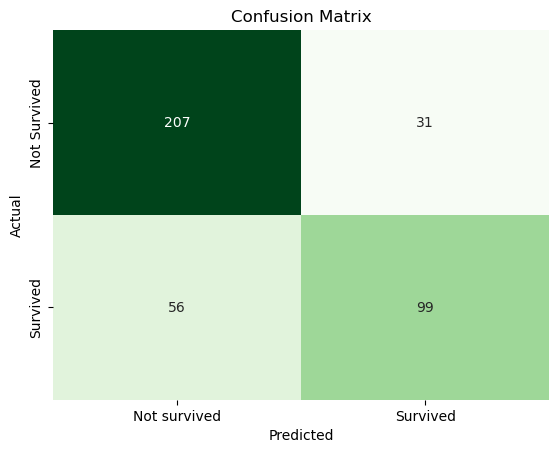

In [46]:
from sklearn.metrics import confusion_matrix
cm_dt = confusion_matrix(y_test,y_pred)
cm_dt

import seaborn as sns
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Greens', cbar=False,
            xticklabels=['Not survived', 'Survived'],
            yticklabels=['Not Survived', 'Survived'])

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()